In [1]:
from Classes import PredictClusters

2024-10-29 16:26:30.636297: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-29 16:26:30.638914: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-29 16:26:30.669788: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-29 16:26:30.669811: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-29 16:26:30.670645: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
data_path = "/home/elizahoward/cmspix28-mc-sim/MuC_Output/"
model = PredictClusters(data_directory_path = data_path, tag = 'sig')

['/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig0.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig1.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig10.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig11.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig12.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig13.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig14.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig15.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig16.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig17.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig18.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig19.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig2.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig20.parquet', '/home/elizahoward/cmspix28-mc-sim/M

Saving batches as TFRecords: 100%|██████████| 1548/1548 [00:08<00:00, 186.78it/s]


--- Training generator 23.552232265472412 seconds ---
['/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig65.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig66.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig67.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig68.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig69.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig7.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig70.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig71.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig72.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig73.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig74.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig75.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/recon3Dsig76.parquet', '/home/elizahoward/cmspix28-mc-sim/MuC_Output/rec

Saving batches as TFRecords: 100%|██████████| 374/374 [00:01<00:00, 193.75it/s]


--- Validation generator 6.185487985610962 seconds ---
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13, 21, 2)]       0         
                                                                 
 q_separable_conv2d (QSepar  (None, 11, 19, 5)         33        
 ableConv2D)                                                     
                                                                 
 q_activation (QActivation)  (None, 11, 19, 5)         0         
                                                                 
 q_conv2d (QConv2D)          (None, 11, 19, 5)         30        
                                                                 
 q_activation_1 (QActivatio  (None, 11, 19, 5)         0         
 n)                                                              
                                                                 
 avera

In [9]:
#model.compileModel(learning_rate=0.0001)
model.runTraining(epochs=1)
#model.loadWeights("/home/elizahoward/smart-pixels-ml/weights/weightsBIBsigPrediction.hdf5")
#model.loadWeights("/home/elizahoward/smart-pixels-ml/weights/weightsSigPrediction.hdf5")

1548/1548 [==============================] - 64s 42ms/step - loss: -65.5643 - val_loss: -71.3844


In [10]:
model.checkResiduals()

374/374 [==============================] - 12s 33ms/step


100%|██████████| 374/374 [00:12<00:00, 30.33it/s]


Mean and standard deviation of residuals for x-midplane: (7.2554398418918105,6.551845352302171)
Mean and standard deviation of residuals for y-midplane: (1.9409220028043193,1.9492251330819308)
Mean and standard deviation of residuals for cotAlpha: (0.2225776336736429,0.207630075810364)
Mean and standard deviation of residuals for cotBeta: (0.06074014802181464,0.26511817129702375)


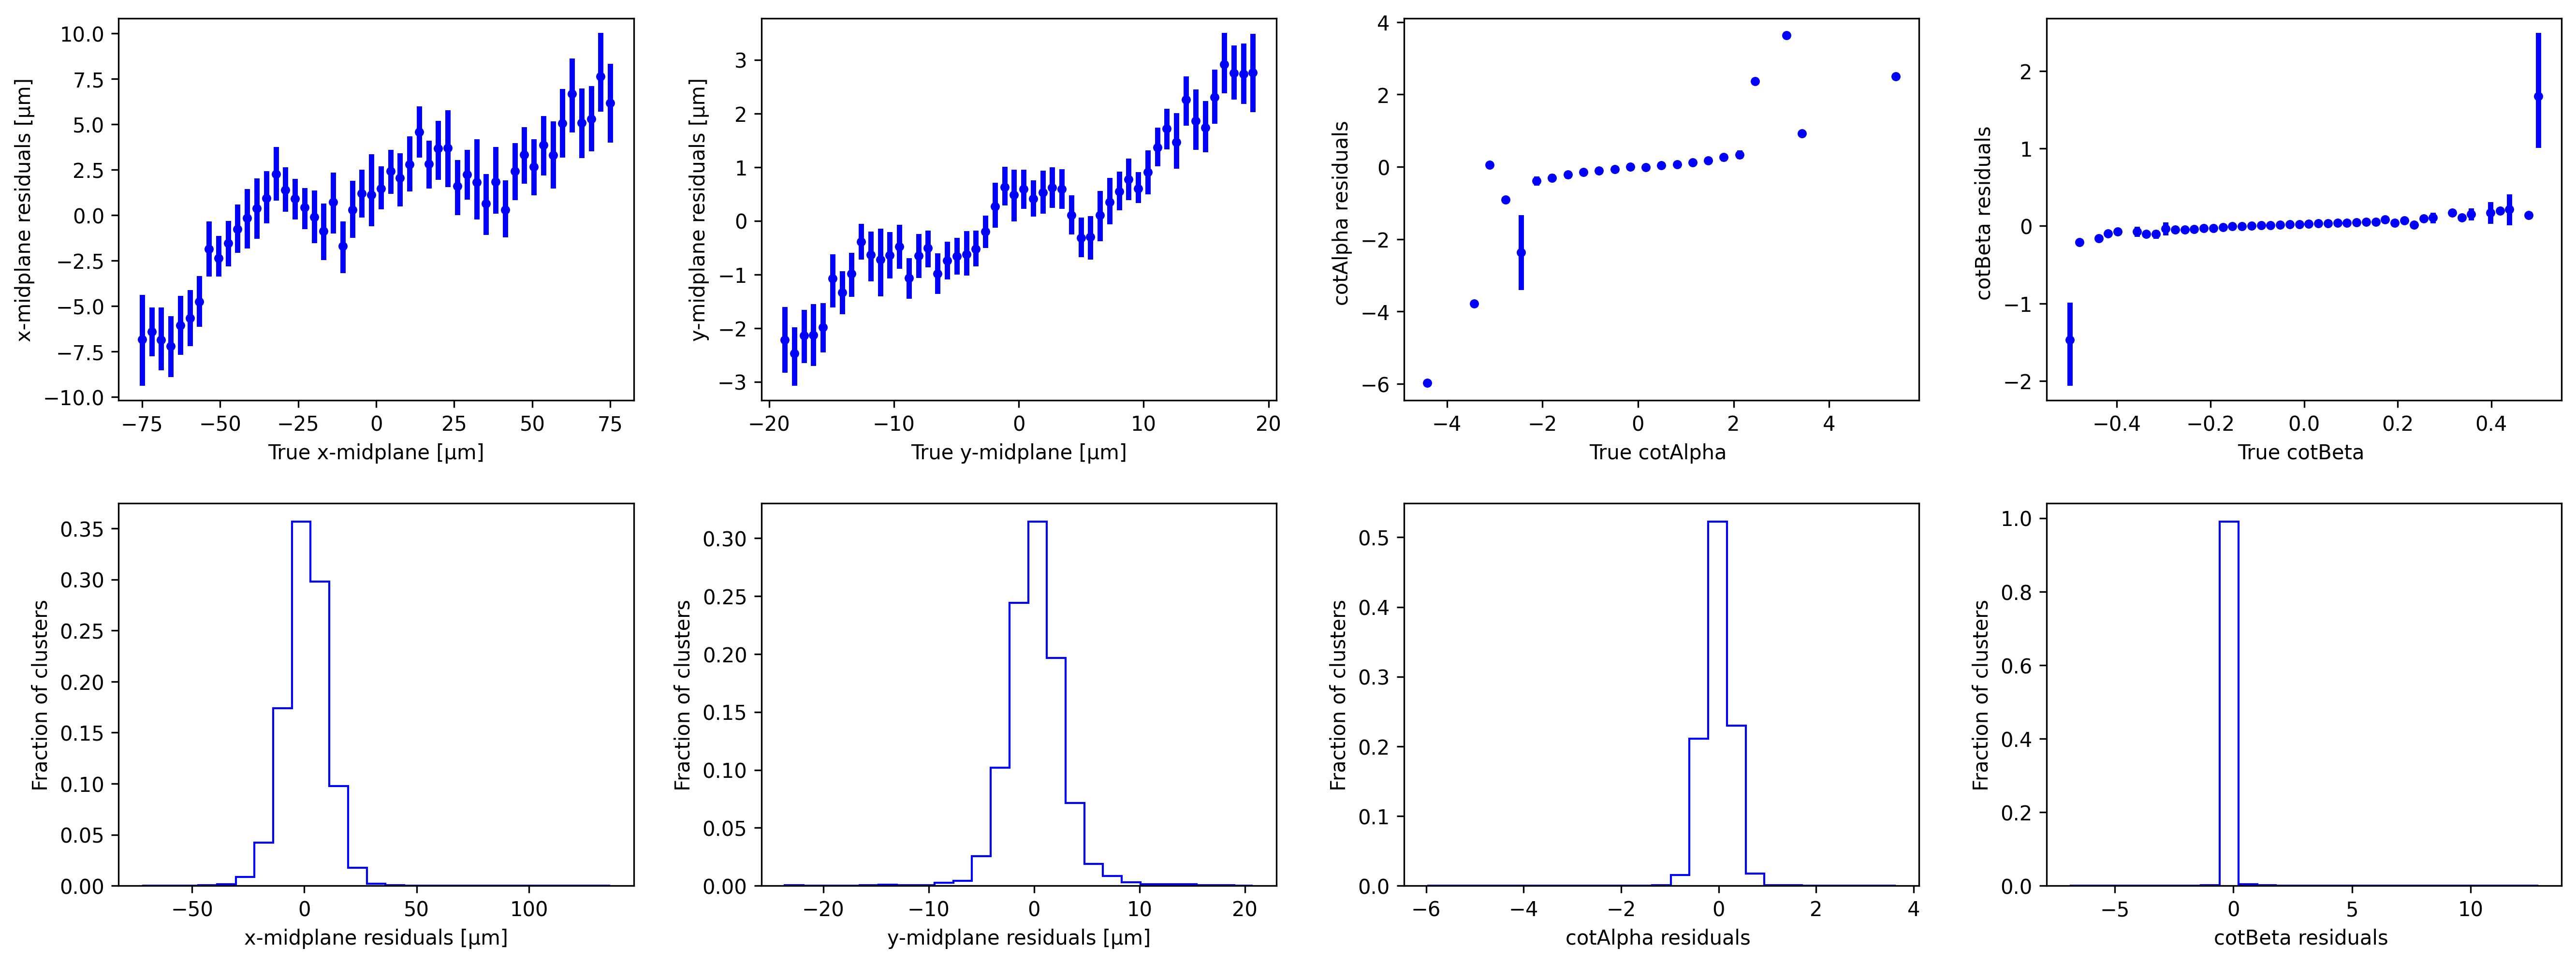

In [11]:
model.plotResiduals()